## Autor: Pablo Veloz M.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.patches as mpatches
#import lec4_graphs as gfx
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual

df = pd.read_csv('Credit.csv', encoding = 'ISO-8859-1',sep=',', engine='python')

# Desafío 1: Prepare el ambiente de trabajo
* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .
* tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [2]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df["flag_Gender"]= np.where(df["Gender"]==" Male",1,0)
df["flag_Student"]= np.where(df["Student"]=="Yes",1,0)
df["flag_Married"]= np.where(df["Married"]=="Yes",1,0)
df["flag_Asian"]= np.where(df["Ethnicity"]=="Asian",1,0)
df["flag_African_American"]= np.where(df["Ethnicity"]=="African American",1,0)
#df.Ethnicity.value_counts()

## - Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .

In [4]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,flag_Gender,flag_Student,flag_Married,flag_Asian,flag_African_American
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,1,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,1,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,0,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,1,0,0


### __Gender__

In [5]:
df.flag_Gender.value_counts()

0    207
1    193
Name: flag_Gender, dtype: int64

### __Student__

In [6]:
df.flag_Student.value_counts()

0    360
1     40
Name: flag_Student, dtype: int64

### __Married__

In [7]:
df.flag_Married.value_counts()

1    245
0    155
Name: flag_Married, dtype: int64

### __Ethnicity__

In [8]:
df.flag_Asian.value_counts()

0    298
1    102
Name: flag_Asian, dtype: int64

In [9]:
df.flag_African_American.value_counts()

0    301
1     99
Name: flag_African_American, dtype: int64

## Desafío 2: Genere gráficos descriptivos para las variables contínuas
* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [10]:
def plot_hist(dataframe, variable):
    tmp = dataframe
    hist_0=tmp[variable]
    sns.set_palette("colorblind")
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    
    sns.distplot(hist_0.dropna(), ax=ax1,kde=False)
    ax1.axvline(np.mean(hist_0),color="r")
    ax1.axvline(np.median(hist_0),color="g")
    #ax1.set_title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    #f, (ax1, ax2) = plt.subplots(1,2)
    promedio = mpatches.Patch(color='red', label='Promedio')
    mediana = mpatches.Patch(color='green', label='Mediana')
    plt.legend(handles=[promedio,mediana])
    plt.title("Histograma "+variable)

### Variable Balance:

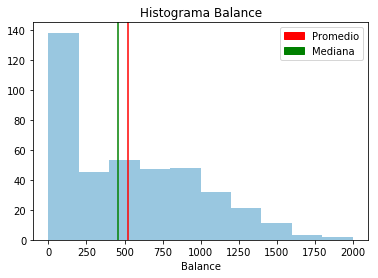

In [11]:
plot_hist(df, 'Balance')

### Variable Income:

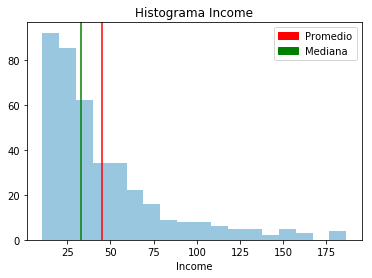

In [12]:
plot_hist(df, 'Income')

### Variable: Cards

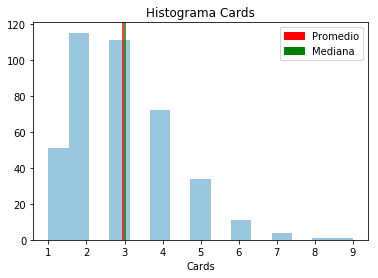

In [13]:
plot_hist(df, 'Cards')

* De los graficos observados, el que genera una mejor distribución 

### Variable: Rating


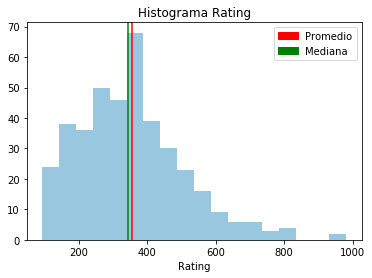

In [14]:
plot_hist(df, 'Rating')

# Desafío 3: Regresión Lineal Simple
* A continuación generaremos una serie de modelos simples:

    * $Balance=\beta_0+\gamma_1\cdot Student+\epsilon$
    * $Balance=\beta_0+\gamma_1\cdot Income+\epsilon$
    * $Balance=\beta_0+\gamma_1\cdot Rating+\epsilon$
        

* Utilizando statsmodels , comente brevemente los siguientes puntos:
* ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
* ¿Qué podemos decir sobre el comportamiento de Student ?
* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

## Balance vs Students

In [15]:
modelo_BS=smf.ols("Balance~Student",df)
modelo_BS=modelo_BS.fit()
modelo_BS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        23:50:53   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Balance vs Income

In [16]:
modelo_BI=smf.ols("Balance~Income",df)
modelo_BI=modelo_BI.fit()
modelo_BI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        23:50:53   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Balance vs Rating

In [17]:
modelo_BR=smf.ols("Balance~Rating",df)
modelo_BR=modelo_BR.fit()
modelo_BR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        23:50:53   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Análisis 
### ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
- Studendt: R-squared:	0.067
- Income: R-squared:	0.215
- Rating: R-squared:	0.746

Al respecto se puede afirmar que la relación de Balance vs Rating genera mayor poder explicativo ya que el 74.6% de los datos se ajustan a la linea de regresion. En general, cuanto más alto sea el R cuadrado, mejor se ajustará el modelo a sus datos.  

### ¿Qué podemos decir sobre el comportamiento de Student ?

Como la relacion entregada por el modelo señala que Studendt: R-squared: 0.067, hay una relación de ajuste lineal minima entre Students y Balance.

### ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

* Supongamos que:
    $H_{o}$: $Me_{female}=Me_{Male}$

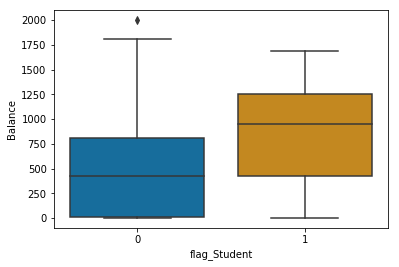

In [18]:
sns.boxplot(x=df["flag_Student"],y=df["Balance"])

A partir de los boxplots, es posible señalar que las medianas son distintas, y por lo tanto se contradice hipotesis nula. Asumiendo, en efecto, que ambas medianas son distintas.

## Desafío 4: Genere un modelo que incluya todos los regresores

$Balance_i=\beta_0+\sum_{j=1}^{N}\beta_{j}\cdot X_{ij}+\epsilon_i$

* Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.


In [19]:
df_dummy2=df.copy()
df_dummy=df.copy()
df_dummy=df_dummy.drop("Balance",axis=1)
df_dummy.columns
regresores=""
regresores2=""
for i in df_dummy.columns:
    regresores+=i+"+"
for i,n in enumerate(regresores):
    regresores2+=n
    if i ==len(regresores)-2:
        break;
print(regresores2)
    


Income+Limit+Rating+Cards+Age+Education+Gender+Student+Married+Ethnicity+flag_Gender+flag_Student+flag_Married+flag_Asian+flag_African_American


### __Modelo:__

In [20]:
modelo_regresores=smf.ols("Balance~Income+Limit+Rating+Cards+Age+Education+flag_Gender+flag_Student+flag_Married+flag_Asian+flag_African_American",df_dummy2).fit()
modelo_regresores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        23:50:54   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -479.7541     34.717    -13.819      0.000    -548.012    -411.497
Income                   -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                     0.1909      0.033      5.824      0.000       0.126       0.255
Rating                    1.1365      0.491      2.315      0.021       0.171       2.102
Cards                    17.7245      4.341      4.083      0.000       9.190      26.259
Age                      -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                -1.0989      1.598     -0.688      0.492      -4.241       2.043
flag_Gender              10.6532      9.914      1.075      0.283      -8.839      30.145
flag_Student            425.7474     16.723     25.459      0.000     392.869     458.626
flag_Married             -8.5339     10.363     -0.824      0.411     -28.908      11.841
flag_Asian                6.6972     12.122      0.552      0.581     -17.137      30.531
flag_African_American   -10.1070     12.210     -0.828      0.408     -34.113      13.899
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Desafío 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value<=0.25. Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [21]:
modelo_regresores.pvalues

Intercept                 1.333827e-35
Income                   7.372312e-116
Limit                     1.205974e-08
Rating                    2.112213e-02
Cards                     5.401200e-05
Age                       3.743127e-02
Education                 4.920746e-01
flag_Gender               2.832368e-01
flag_Student              8.854521e-85
flag_Married              4.107256e-01
flag_Asian                5.809519e-01
flag_African_American     4.083088e-01
dtype: float64

### Las variables que cumplen con que pvalues <0.025 son:

* Income
* Limit
* Rating
* Cards
* flag_Student

In [22]:
modelo_regresores2=smf.ols("Balance~Income+Limit+Rating+Cards+flag_Student",df_dummy2).fit()
modelo_regresores2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          3.60e-261
Time:                        23:50:54   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income          -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit            0.1944      0.033      5.977      0.000       0.130       0.258
Rating           1.0879      0.487      2.234      0.026       0.130       2.045
Cards           17.8517      4.335      4.118      0.000       9.329      26.374
flag_Student   426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* __Si comparamos los modelos con la condición de pvalues y enfocandonos en R-square en el segundo modelo disminuye en de 0.955 a 0.954 y por lo tanto el primer modelo tiene un mejor ajuste de regresión lineal__.
* __En cuanto al R-squared adjust se mantiene con el mismo valor__.

## __Desafío 6:__
* Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.
#### Comprobando __tvalues__

In [23]:
modelo_regresores.tvalues

Intercept               -13.818901
Income                  -33.313573
Limit                     5.824124
Rating                    2.315216
Cards                     4.083011
Age                      -2.088200
Education                -0.687665
flag_Gender               1.074566
flag_Student             25.459430
flag_Married             -0.823507
flag_Asian                0.552459
flag_African_American    -0.827771
dtype: float64

### __Las tres variables principales son:__
* Income
* Limit
* flag_Student

In [86]:
def grafico(dataframe,lista):
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.6,right = 2.0)
    for i,n in enumerate(lista):
        #ax1 = fig.add_subplot(1,3, i+1)
        sns.set_style("dark")
        sns.set_palette("gnuplot_r")
        sns.set_context("paper",font_scale=1.5)
        sns.lmplot(x=n,y="Balance",data=dataframe)
        
        plt.title("Gráfico "+str(n)+" v/s "+"Balance")
    #plt.show()

<Figure size 432x288 with 0 Axes>

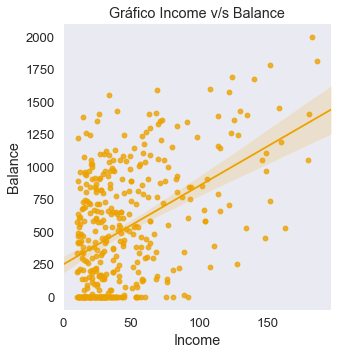

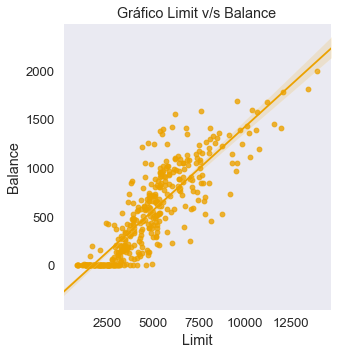

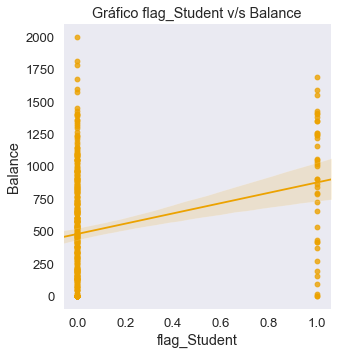

In [87]:
grafico(df,["Income","Limit","flag_Student"])

### Análisis:
* De los tres modelos, el que mejor se ajusta a una regresion lineal cuando se relacionan con la variable Balance, es la variable __Limit.__
* Las tres variables se tienen una relación __positiva__ respecto a la variable __Balance.__
* Desde el Gráfico Income vs Balance, se observa una mayor dispersión de los datos, Esto no se puede apreciar desde flag_Student vs Balance